In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score, recall_score
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split

In [2]:
# loading train dataset
df_train = pd.read_csv('train.csv')
df_train

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


In [3]:
# loading test dataset
df_test = pd.read_csv('test.csv')
df_test

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,GA,130,area_code_415,no,no,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0
746,747,WA,73,area_code_408,no,no,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3
747,748,WV,152,area_code_415,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
748,749,DC,61,area_code_415,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1


## First we perform EDA on dataset

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

* there are no missing values in this data set.

In [6]:
# Outlier detection
df_train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
df_test.describe()

,id,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,750.00000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,375.50000,100.385333,8.454667,180.454933,100.721333,30.677920,203.258267,100.273333,17.277080,199.619467,100.370667,8.982827,10.294133,4.485333,2.779933,1.634667
std,216.65064,39.699029,14.123712,53.258337,19.718539,9.053756,52.185471,19.367535,4.435638,51.531351,19.185238,2.318920,2.770340,2.421901,0.747704,1.276207
min,1.00000,1.000000,0.000000,12.500000,39.000000,2.130000,31.200000,37.000000,2.650000,50.900000,12.000000,2.290000,0.000000,0.000000,0.000000,0.000000
25%,188.25000,74.000000,0.000000,146.625000,88.000000,24.925000,166.800000,87.000000,14.177500,164.475000,88.000000,7.402500,8.525000,3.000000,2.305000,1.000000
50%,375.50000,101.000000,0.000000,178.200000,101.000000,30.295000,203.350000,101.000000,17.285000,199.450000,100.500000,8.975000,10.300000,4.000000,2.780000,1.000000
75%,562.75000,126.000000,21.000000,215.975000,114.000000,36.715000,235.975000,113.000000,20.057500,234.800000,113.000000,10.565000,12.100000,6.000000,3.270000,2.000000
max,750.00000,238.000000,51.000000,350.800000,163.000000,59.640000,363.700000,164.000000,30.910000,364.300000,168.000000,16.390000,18.900000,19.000000,5.100000,6.000000


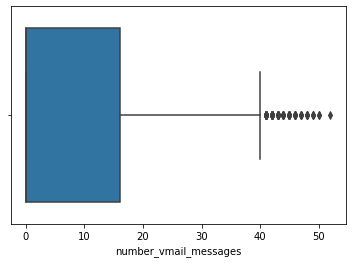

In [8]:
sns.boxplot(data=df_train,x = df_train['number_vmail_messages'])
plt.show()

In [9]:
Q1 = np.percentile(df_train['number_vmail_messages'],25)
Q3 = np.percentile(df_train['number_vmail_messages'],75)
IQR = Q3-Q1
lower_fence = Q1 - (1.5*IQR)
upper_fence = Q3 + (1.5*IQR)
df_train['number_vmail_messages'] = df_train['number_vmail_messages'].apply(lambda x : x if x < upper_fence else upper_fence)

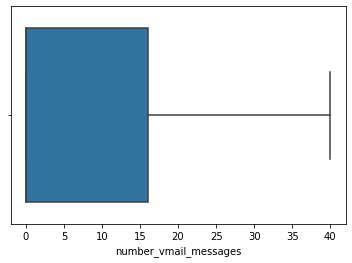

In [10]:
sns.boxplot(data=df_train,x = df_train['number_vmail_messages'])
plt.show()

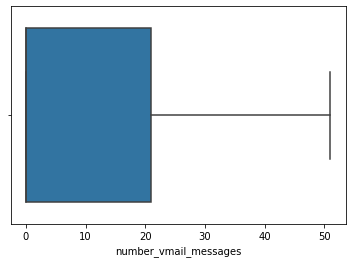

In [11]:
sns.boxplot(data=df_test,x = df_test['number_vmail_messages'])
plt.show()

<AxesSubplot:>

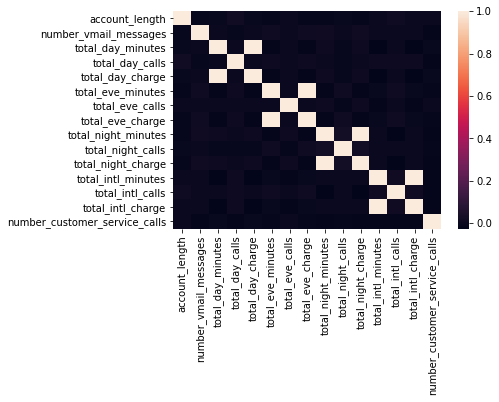

In [12]:
# find correlation between features of training set
sns.heatmap(df_train.corr())

In [13]:
df_train.drop(['total_day_charge','total_eve_charge','total_night_charge','total_intl_charge'],axis=1,inplace=True)

<AxesSubplot:>

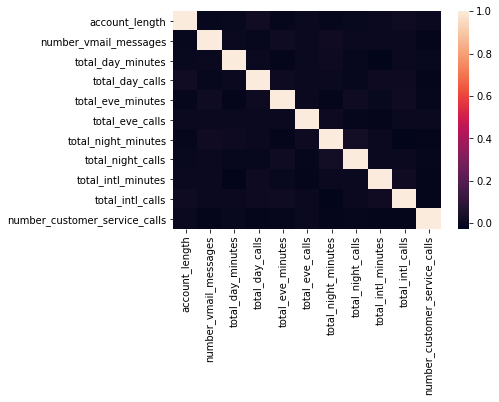

In [14]:
sns.heatmap(df_train.corr())

<AxesSubplot:>

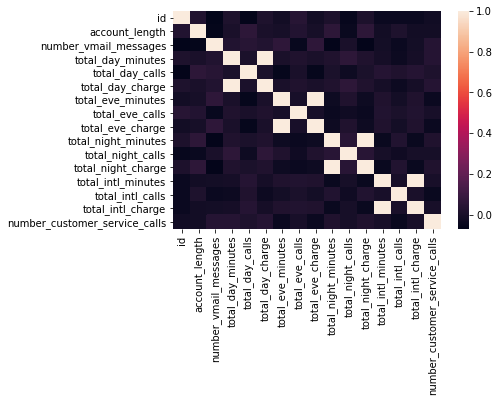

In [15]:
# find correlation between features of testing set
sns.heatmap(df_test.corr())

In [16]:
df_test.drop(['total_day_charge','total_eve_charge','total_night_charge','total_intl_charge'],axis=1,inplace=True)

<AxesSubplot:>

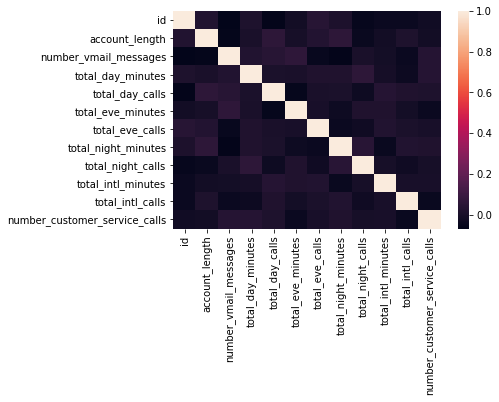

In [17]:
sns.heatmap(df_test.corr())

### Split the data

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = df_train.drop(columns=["churn"])
y = df_train["churn"]

In [20]:
X_train, X_validate, y_train, y_validate = train_test_split(X,y,train_size=0.8, test_size = 0.2, random_state=41)

In [21]:
# make pipeline 
categorical_features = ['state','area_code']
numeric_features = ['account_length','total_day_minutes','total_day_calls','total_eve_minutes','total_eve_calls','total_night_minutes','total_night_calls','total_intl_minutes','total_intl_calls']
binary_features = ['international_plan','voice_mail_plan']
ordinal_features = ['number_vmail_messages','number_customer_service_calls']

In [22]:
for i in df_train.columns:
    print(df_train[i].value_counts())

WV    139
MN    108
ID    106
AL    101
VA    100
OR     99
TX     98
UT     97
NY     96
NJ     96
OH     95
WY     95
WI     94
MA     89
ME     89
CT     88
MI     87
RI     87
KS     87
VT     86
MD     86
KY     85
NV     83
IN     83
MS     82
NC     80
MT     80
MO     80
DE     80
CO     80
WA     80
TN     79
IL     79
OK     78
NH     78
NM     78
HI     77
AZ     77
FL     76
SD     75
NE     73
SC     72
DC     72
AR     71
LA     69
PA     67
ND     67
GA     64
IA     62
AK     61
CA     39
Name: state, dtype: int64
90     53
87     51
93     50
105    48
120    48
       ..
191     1
202     1
199     1
215     1
243     1
Name: account_length, Length: 215, dtype: int64
area_code_415    2108
area_code_408    1086
area_code_510    1056
Name: area_code, dtype: int64
no     3854
yes     396
Name: international_plan, dtype: int64
no     3138
yes    1112
Name: voice_mail_plan, dtype: int64
0.0     3139
40.0     108
31.0      69
28.0      58
24.0      57
29.0      57
33.0     

In [23]:
df_train.shape

(4250, 16)

In [24]:
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder

In [25]:
ct = make_column_transformer(
    (
        OneHotEncoder(sparse=False,handle_unknown="ignore"),
        categorical_features,
    ),  # OHE on categorical features
    (
        StandardScaler(),
        numeric_features
    ), # scaling on numeric features
    
    (
        OrdinalEncoder(dtype=int),
        ordinal_features,
    ),  # Ordinal encoding on ordinal features
    (
        OneHotEncoder(drop="if_binary", dtype=int),
        binary_features,
    ),  # OHE on categorical features
)

In [26]:
ct

ColumnTransformer(transformers=[('onehotencoder-1',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['state', 'area_code']),
                                ('standardscaler', StandardScaler(),
                                 ['account_length', 'total_day_minutes',
                                  'total_day_calls', 'total_eve_minutes',
                                  'total_eve_calls', 'total_night_minutes',
                                  'total_night_calls', 'total_intl_minutes',
                                  'total_intl_calls']),
                                ('ordinalencoder',
                                 OrdinalEncoder(dtype=<class 'int'>),
                                 ['number_vmail_messages',
                                  'number_customer_service_calls']),
                                ('onehotencoder-2',
                                 OneHotEncoder(drop='if_binary',
                                               dtype=<class 'int'>),
                                 ['international_plan', 'voice_mail_plan'])])

In [27]:
ct.fit(X_train)
X_transformed = ct.transform(X_train)
X_transformed.shape

(3400, 67)

In [28]:
column_names = (ct.named_transformers_['onehotencoder-1'].get_feature_names().tolist() 
+ numeric_features 
+ ordinal_features 
+ ct.named_transformers_['onehotencoder-2'].get_feature_names().tolist()
               )
len(column_names)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


67

In [29]:
X_transformed

array([[0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 2., 0., 0.],
       [0., 0., 0., ..., 3., 1., 0.]])

In [30]:
X_train_transformed = pd.DataFrame(X_transformed, columns=column_names)

In [31]:
X_train_transformed.head()

,x0_AK,x0_AL,x0_AR,x0_AZ,x0_CA,x0_CO,x0_CT,x0_DC,x0_DE,x0_FL,...,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_vmail_messages,number_customer_service_calls,x0_yes,x1_yes
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.361336,-0.307585,-0.318195,0.298913,1.561573,1.046063,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.633166,0.795146,0.908606,0.498276,-0.361972,-0.584103,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.155842,0.594649,0.450044,-1.943921,1.851920,-1.399185,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.342322,0.995643,0.422253,-0.448699,0.545360,-0.991644,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.327821,0.243780,0.321012,0.099550,0.835707,0.230980,0.0,2.0,0.0,0.0


In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [33]:
# building model using knn
knn_pipe = make_pipeline(ct, KNeighborsClassifier())
knn_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder-1',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['state', 'area_code']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['account_length',
                                                   'total_day_minutes',
                                                   'total_day_calls',
                                                   'total_eve_minutes',
                                                   'total_eve_calls',
                                                   'total_night_minutes',
                                                   'total_night_calls',
                                                   'total_intl_minutes',
                                                   'total_intl_calls']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(dtype=<class 'int'>),
                                                  ['number_vmail_messages',
                                                   'number_customer_service_calls']),
                                                 ('onehotencoder-2',
                                                  OneHotEncoder(drop='if_binary',
                                                                dtype=<class 'int'>),
                                                  ['international_plan',
                                                   'voice_mail_plan'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [34]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [35]:
import warnings
warnings.filterwarnings("ignore")

In [36]:
results_dict = {}
results_dict['KNN'] = mean_std_cross_val_scores(knn_pipe, X_train, y_train, return_train_score=True)

In [37]:
# building model using svc
svc_pipe = make_pipeline(ct, SVC())
svc_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder-1',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['state', 'area_code']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['account_length',
                                                   'total_day_minutes',
                                                   'total_day_calls',
                                                   'total_eve_minutes',
                                                   'total_eve_calls',
                                                   'total_night_minutes',
                                                   'total_night_calls',
                                                   'total_intl_minutes',
                                                   'total_intl_calls']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(dtype=<class 'int'>),
                                                  ['number_vmail_messages',
                                                   'number_customer_service_calls']),
                                                 ('onehotencoder-2',
                                                  OneHotEncoder(drop='if_binary',
                                                                dtype=<class 'int'>),
                                                  ['international_plan',
                                                   'voice_mail_plan'])])),
                ('svc', SVC())])

In [38]:
results_dict['SVC'] = mean_std_cross_val_scores(svc_pipe, X_train, y_train, return_train_score=True)

In [39]:
# building model using naive bayes
from sklearn.naive_bayes import GaussianNB
nbc_pipe = make_pipeline(ct, GaussianNB())
nbc_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder-1',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['state', 'area_code']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['account_length',
                                                   'total_day_minutes',
                                                   'total_day_calls',
                                                   'total_eve_minutes',
                                                   'total_eve_calls',
                                                   'total_night_minutes',
                                                   'total_night_calls',
                                                   'total_intl_minutes',
                                                   'total_intl_calls']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(dtype=<class 'int'>),
                                                  ['number_vmail_messages',
                                                   'number_customer_service_calls']),
                                                 ('onehotencoder-2',
                                                  OneHotEncoder(drop='if_binary',
                                                                dtype=<class 'int'>),
                                                  ['international_plan',
                                                   'voice_mail_plan'])])),
                ('gaussiannb', GaussianNB())])

In [40]:
results_dict['NBC'] = mean_std_cross_val_scores(nbc_pipe, X_train, y_train, return_train_score=True)

In [41]:
# building model usingdecision tree
dtc_pipe = make_pipeline(ct, DecisionTreeClassifier())
dtc_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder-1',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['state', 'area_code']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['account_length',
                                                   'total_day_minutes',
                                                   'total_day_calls',
                                                   'total_eve_minutes',
                                                   'total_eve_calls',
                                                   'total_night_minutes',
                                                   'total_night_calls',
                                                   'total_intl_minutes',
                                                   'total_intl_calls']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(dtype=<class 'int'>),
                                                  ['number_vmail_messages',
                                                   'number_customer_service_calls']),
                                                 ('onehotencoder-2',
                                                  OneHotEncoder(drop='if_binary',
                                                                dtype=<class 'int'>),
                                                  ['international_plan',
                                                   'voice_mail_plan'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [42]:
results_dict['DTC'] = mean_std_cross_val_scores(dtc_pipe, X_train, y_train, return_train_score=True)

## Scores get by default hyperparameters

In [43]:
pd.DataFrame(results_dict)

,KNN,SVC,NBC,DTC
fit_time,0.040 (+/- 0.005),0.458 (+/- 0.083),0.045 (+/- 0.007),0.114 (+/- 0.014)
score_time,0.166 (+/- 0.127),0.123 (+/- 0.092),0.013 (+/- 0.007),0.015 (+/- 0.004)
test_score,0.881 (+/- 0.007),0.860 (+/- 0.001),0.607 (+/- 0.017),0.915 (+/- 0.003)
train_score,0.903 (+/- 0.002),0.860 (+/- 0.000),0.602 (+/- 0.017),1.000 (+/- 0.000)


In [44]:
from sklearn.model_selection import GridSearchCV

pipe_svm = make_pipeline(ct, SVC())

param_grid = {
    "svc__gamma": [0.001, 0.01, 0.1, 1.0, 10, 100],
    "svc__C": [0.001, 0.01, 0.1, 1.0, 10, 100],
}

grid_search_svc = GridSearchCV(
    pipe_svm, param_grid, cv=5, n_jobs=-1, return_train_score=True
)

In [45]:
grid_search_svc.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder-1',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['state',
                                                                          'area_code']),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         ['account_length',
                                                                          'total_day_minutes',
                                                                          'total_day_calls',
                                                                          'total_eve_minutes',
                                                                          'total_eve_calls',
                                                                          'total_night_minutes',
                                                                          'total_n...
                                                                         OrdinalEncoder(dtype=<class 'int'>),
                                                                         ['number_vmail_messages',
                                                                          'number_customer_service_calls']),
                                                                        ('onehotencoder-2',
                                                                         OneHotEncoder(drop='if_binary',
                                                                                       dtype=<class 'int'>),
                                                                         ['international_plan',
                                                                          'voice_mail_plan'])])),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1.0, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1.0, 10, 100]},
             return_train_score=True)

### Visualizing the parameter grid 

In [46]:
param_grid

{'svc__gamma': [0.001, 0.01, 0.1, 1.0, 10, 100],
 'svc__C': [0.001, 0.01, 0.1, 1.0, 10, 100]}

In [47]:
grid_search_svc.best_params_

{'svc__C': 0.001, 'svc__gamma': 0.001}

In [48]:
results_svc = pd.DataFrame(grid_search_svc.cv_results_)[['mean_test_score', 'params']]

In [49]:
svc_pipe1 = make_pipeline(ct, SVC(C=0.001, gamma=0.001))
svc_pipe1

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder-1',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['state', 'area_code']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['account_length',
                                                   'total_day_minutes',
                                                   'total_day_calls',
                                                   'total_eve_minutes',
                                                   'total_eve_calls',
                                                   'total_night_minutes',
                                                   'total_night_calls',
                                                   'total_intl_minutes',
                                                   'total_intl_calls']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(dtype=<class 'int'>),
                                                  ['number_vmail_messages',
                                                   'number_customer_service_calls']),
                                                 ('onehotencoder-2',
                                                  OneHotEncoder(drop='if_binary',
                                                                dtype=<class 'int'>),
                                                  ['international_plan',
                                                   'voice_mail_plan'])])),
                ('svc', SVC(C=0.001, gamma=0.001))])

In [50]:
svc_pipe1.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder-1',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['state', 'area_code']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['account_length',
                                                   'total_day_minutes',
                                                   'total_day_calls',
                                                   'total_eve_minutes',
                                                   'total_eve_calls',
                                                   'total_night_minutes',
                                                   'total_night_calls',
                                                   'total_intl_minutes',
                                                   'total_intl_calls']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(dtype=<class 'int'>),
                                                  ['number_vmail_messages',
                                                   'number_customer_service_calls']),
                                                 ('onehotencoder-2',
                                                  OneHotEncoder(drop='if_binary',
                                                                dtype=<class 'int'>),
                                                  ['international_plan',
                                                   'voice_mail_plan'])])),
                ('svc', SVC(C=0.001, gamma=0.001))])

In [51]:
results_dict_grid = {}

In [52]:
# results_dict_grid['SVC_grid'] = mean_std_cross_val_scores(svc_pipe1, X_train, y_train, return_train_score=True)

In [53]:
# results_dict_grid

{}